<a href="https://colab.research.google.com/github/abhinav-bhardwaj-mnit/Abhinav-1st/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv
Saving iris.png to iris.png


In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


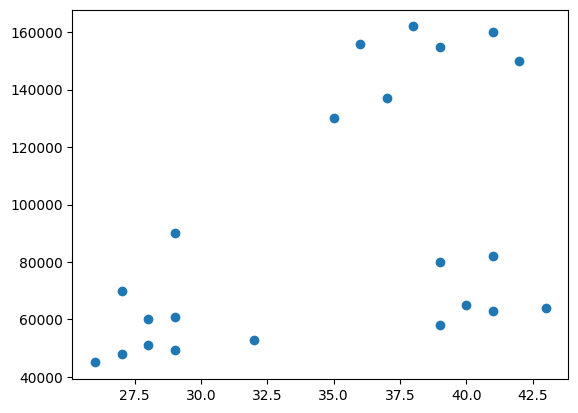

In [5]:
plt.scatter(df['Age'],df['Income($)'])

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [10]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


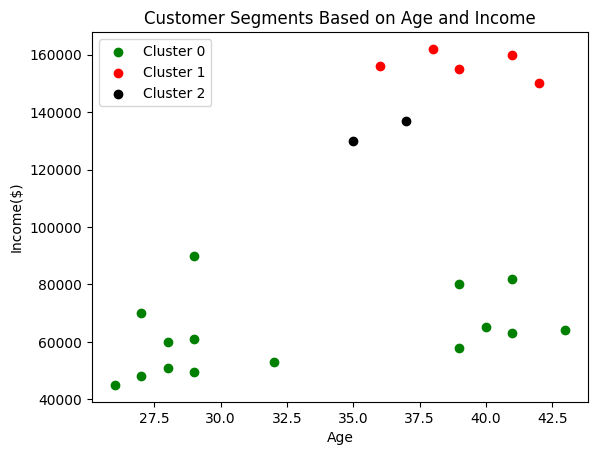

In [16]:
import matplotlib.pyplot as plt

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.title("Customer Segments Based on Age and Income")
plt.show()
# not ideal clustering

In [40]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']]) #or use df.Age

df


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,2


In [38]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

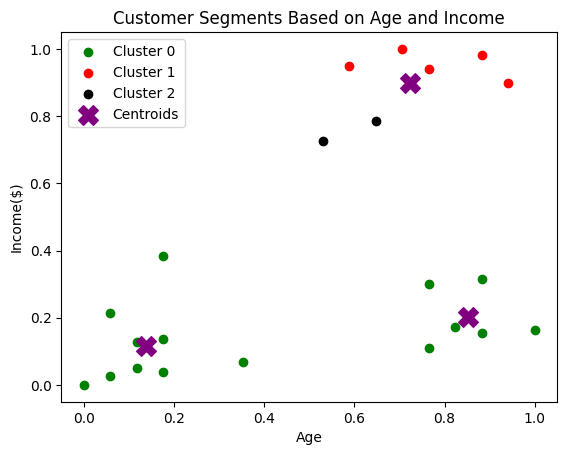

In [39]:
import matplotlib.pyplot as plt

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='X', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.title("Customer Segments Based on Age and Income")
plt.show()

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
plt.xlabel('k')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Optional: Print the raw SSE values
print(sse)


AttributeError: 'list' object has no attribute 'head'

In [44]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# use of minmax scaler
data = pd.DataFrame({
    'Age': [20, 40, 60],
    'Income': [30000, 80000, 150000]
})

scaler = MinMaxScaler()
#X_scaled = (X - X_min) / (X_max - X_min)
scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

print(scaled_df)


   Age    Income
0  0.0  0.000000
1  0.5  0.416667
2  1.0  1.000000
